# WAZE Churn Rate EDA 

### **According to the PACE structure (Plan, Analyze, Construct and Execute)**



# **PACE: Plan**





### **Imports and data loading**

For EDA of the data, We are importing the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

# **PACE: Analyze**


#### **Data overview and summary statistics**

In [3]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [4]:
df.size

194987

In [5]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [59]:
df.shape

(14999, 16)

In [51]:
df.value_counts().sum()

14198

In [54]:
df.dropna().count()

ID                                  14198
label                               14198
sessions                            14198
drives                              14198
total_sessions                      14198
n_days_after_onboarding             14198
total_navigations_fav1              14198
total_navigations_fav2              14198
driven_km_drives                    14198
duration_minutes_drives             14198
activity_days                       14198
driving_days                        14198
device                              14198
km_per_driving_day                  14198
percent_sessions_in_last_month      14198
monthly_drives_per_session_ratio    14198
dtype: int64

In [56]:
df.nunique()

ID                                  14999
label                                   2
sessions                              244
drives                                202
total_sessions                      14250
n_days_after_onboarding              3441
total_navigations_fav1                730
total_navigations_fav2                287
driven_km_drives                    14250
duration_minutes_drives             14250
activity_days                          32
driving_days                           31
device                                  2
km_per_driving_day                  13976
percent_sessions_in_last_month      14895
monthly_drives_per_session_ratio     1236
dtype: int64

In [72]:
df.isnull().sum()

ID                                    0
label                               700
sessions                              0
drives                                0
total_sessions                        0
n_days_after_onboarding               0
total_navigations_fav1                0
total_navigations_fav2                0
driven_km_drives                      0
duration_minutes_drives               0
activity_days                         0
driving_days                          0
device                                0
km_per_driving_day                    0
percent_sessions_in_last_month        0
monthly_drives_per_session_ratio    105
dtype: int64

In [76]:
df.sort_values(by='ID').head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio
0,0,retained,243,201,296.75,2276,208,0,2628.85,1985.78,28,19,Android,138.36,95.37,0.83
1,1,retained,133,107,326.90,1225,19,64,8889.78,3160.47,13,11,iPhone,1246.90,40.69,0.80
2,2,retained,114,95,135.52,2651,0,0,3059.15,1610.74,14,8,Android,382.39,84.12,0.83
3,3,retained,49,40,67.59,15,322,7,913.59,587.20,7,3,iPhone,304.53,72.50,0.82
4,4,retained,84,68,168.25,1562,166,5,3950.20,1219.56,27,18,Android,219.46,49.93,0.81
5,5,retained,113,103,279.54,2637,0,0,901.24,439.10,15,11,iPhone,81.93,40.42,0.91
6,6,retained,3,2,236.73,360,185,18,5249.17,726.58,28,23,iPhone,228.22,1.27,0.67
7,7,retained,39,35,176.07,2999,0,0,7892.05,2466.98,22,20,iPhone,394.60,22.15,0.90
8,8,retained,57,46,183.53,424,0,26,2651.71,1594.34,25,20,Android,132.59,31.06,0.81
9,9,churned,84,68,244.80,2997,72,0,6043.46,2341.84,7,3,iPhone,2014.49,34.31,0.81


In [9]:
df.corr()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
ID,1.000000,0.011240,0.010470,0.002909,-0.005673,-0.000606,-0.000771,-0.003561,-0.001594,-0.001887,-0.001808
sessions,0.011240,1.000000,0.996822,0.589079,0.005676,0.005713,0.006185,0.002113,-0.006113,0.024194,0.018973
drives,0.010470,0.996822,1.000000,0.586741,0.005216,0.005017,0.007572,0.001883,-0.005855,0.024043,0.018847
total_sessions,0.002909,0.589079,0.586741,1.000000,0.004731,0.002137,0.006421,-0.000416,-0.001689,0.013449,0.009912
n_days_after_onboarding,-0.005673,0.005676,0.005216,0.004731,1.000000,0.000435,-0.008075,-0.003213,-0.009646,-0.009725,-0.008563
total_navigations_fav1,-0.000606,0.005713,0.005017,0.002137,0.000435,1.000000,0.002306,-0.007690,0.002097,0.011066,0.010359
total_navigations_fav2,-0.000771,0.006185,0.007572,0.006421,-0.008075,0.002306,1.000000,0.000081,-0.004091,-0.004036,0.001951
driven_km_drives,-0.003561,0.002113,0.001883,-0.000416,-0.003213,-0.007690,0.000081,1.000000,0.697866,-0.002601,-0.005487
duration_minutes_drives,-0.001594,-0.006113,-0.005855,-0.001689,-0.009646,0.002097,-0.004091,0.697866,1.000000,-0.002830,-0.005145
activity_days,-0.001887,0.024194,0.024043,0.013449,-0.009725,0.011066,-0.004036,-0.002601,-0.002830,1.000000,0.947706


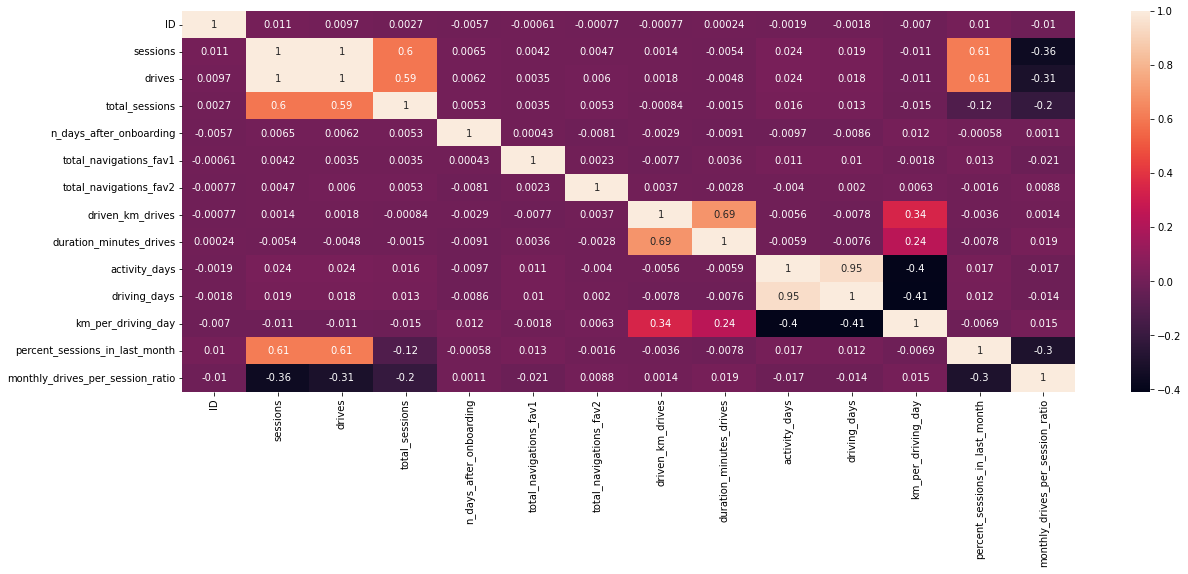

In [80]:
sns.heatmap(df.corr(), annot = True)

plt.rcParams['figure.figsize'] = (100,7)

plt.show()

In [87]:
df_bydevice = df.groupby('device').mean().sort_values(by="sessions",ascending=False)

In [89]:
df_bydevice.transpose()

device,iPhone,Android
ID,7462.79,7564.75
sessions,77.09,75.62
drives,64.45,63.35
total_sessions,184.91,182.43
n_days_after_onboarding,1740.82,1766.20
total_navigations_fav1,121.89,121.09
total_navigations_fav2,29.67,29.68
driven_km_drives,3938.77,3941.20
duration_minutes_drives,1782.65,1802.34
activity_days,15.47,15.65



# **PACE: Construct**



# Visualizations for EDA

A combo of Boxplot, Histogram, scatter plot and pie chart is a helpful visualization strategy for this analysis.

# The number of occurrence of a user opening the app during the month

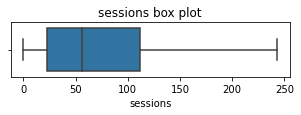

In [77]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('sessions box plot');

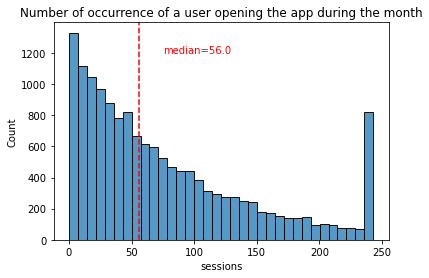

In [67]:
# Histogram
sns.histplot(data=df, x='sessions')
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')
plt.title('Number of occurrence of a user opening the app during the month');

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

# An occurrence of driving at least 1 km during the month

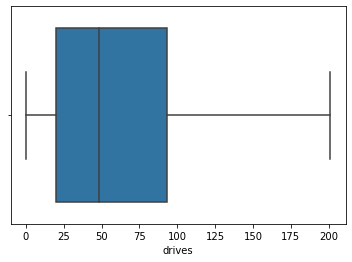

In [68]:
# Box plot
sns.boxplot(x='drives', data=df,fliersize=1)


Text(0.5, 1.0, 'Number of occurrence of a users total sessions')

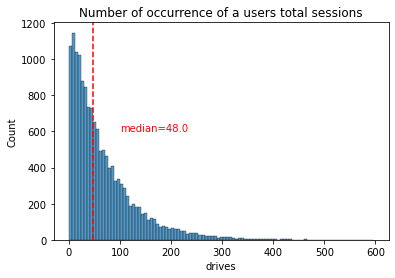

In [10]:
# Histogram
sns.histplot(data=df, x='drives')
plt.title('Number of occurrence of a user opening the app and drives during the month')
median = df['drives'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(100,600, 'median=48.0', color='red')
plt.title('Number of occurrence of a users total sessions')

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

# A model estimate of the total number of sessions since a user has onboarded

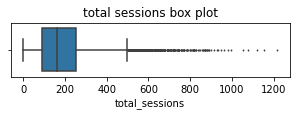

In [11]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('total sessions box plot');

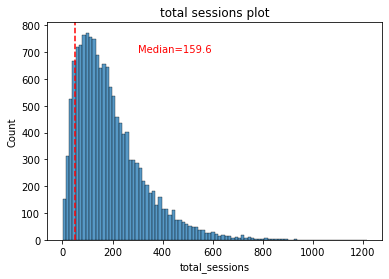

In [12]:
# Histogram
sns.histplot(data=df, x='total_sessions')
median = df['drives'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(300,700, 'Median=159.6', color='red')
plt.title('total sessions plot');

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

# The number of days since a user signed up for the app

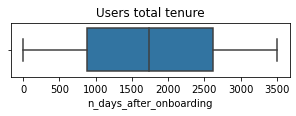

In [13]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x='n_days_after_onboarding', data=df,fliersize=1)
plt.title('Users total tenure');

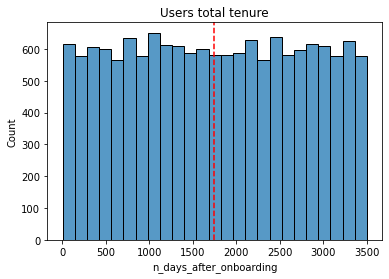

In [14]:
# Histogram
sns.histplot(data=df, x='n_days_after_onboarding')
plt.title('Users total tenure');
median = df['n_days_after_onboarding'].median()
plt.axvline(median, color='red', linestyle='--')


The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

# Total kilometers driven during the month

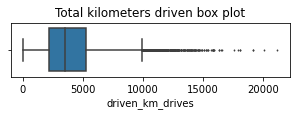

In [15]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('Total kilometers driven box plot');

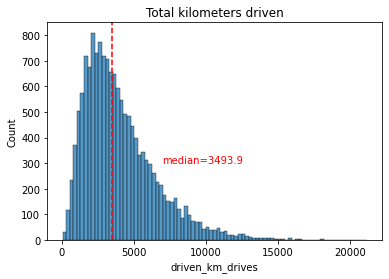

In [16]:
# Histogram
sns.histplot(data=df, x='driven_km_drives')
median = df['driven_km_drives'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(7000,300, 'median=3493.9', color='red')
plt.title('Total kilometers driven');


The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

# Total duration driven in minutes during the month

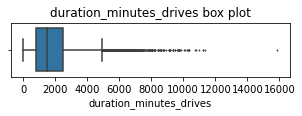

In [17]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=1)
plt.title('duration_minutes_drives box plot');

Text(0.5, 1.0, 'Duration of minutes driven')

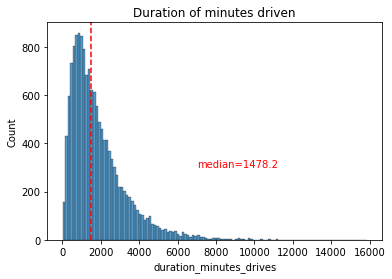

In [18]:
# Histogram
sns.histplot(data=df, x='duration_minutes_drives')
median = df['duration_minutes_drives'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(7000,300, 'median=1478.2', color='red')
plt.title('Total kilometers driven');
plt.title('Duration of minutes driven')

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

# Number of days the user opens the app during the month

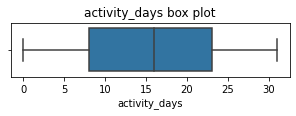

In [19]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['activity_days'], fliersize=1)
plt.title('activity_days box plot');

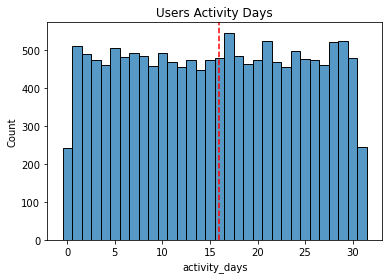

In [20]:
# Histogram
sns.histplot(data=df, x=df['activity_days'], discrete=True)
median = df['activity_days'].median()
plt.axvline(median, color='red', linestyle='--')
plt.title('Total kilometers driven');
plt.title('Users Activity Days');

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

# Number of days the user drives (at least 1 km) during the month

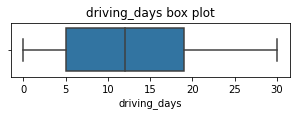

In [21]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('driving_days box plot');

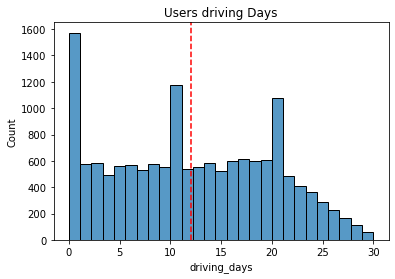

In [22]:
# Histogram
sns.histplot(data=df, x='driving_days')
median = df['driving_days'].median()
plt.axvline(median, color='red', linestyle='--')
plt.title('Total kilometers driven');
plt.title('Users driving Days');

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

# The type of device a user starts a session with

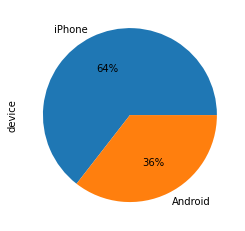

In [23]:
# Pie chart
df["device"].replace("", np.nan).value_counts(dropna=False).plot(kind="pie", autopct='%1.0f%%')


There are nearly twice as many iPhone users as Android users represented in this data.

# Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month

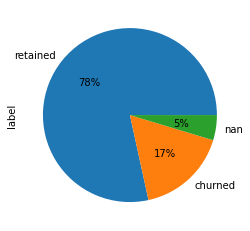

In [24]:
# Pie chart
df["label"].replace("").value_counts(dropna=False).plot(kind="pie", autopct='%1.0f%%')


Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

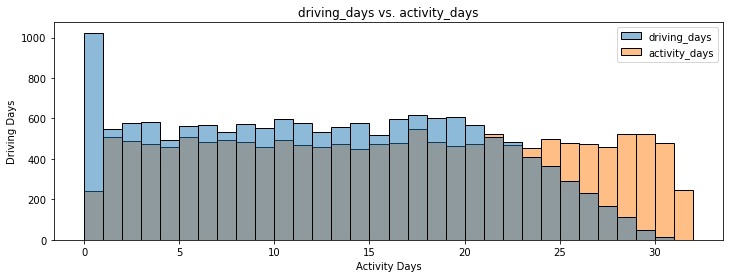

In [25]:
# Histogram
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
sns.histplot([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('Activity Days')
plt.ylabel('Driving Days')
plt.title('driving_days vs. activity_days');

# Maximum number of days for each driving_days and activity_days

In [26]:
df['driving_days'].max()
df['activity_days'].max()

31

Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

Text(0.5, 1.0, 'driving_days vs. activity_days')

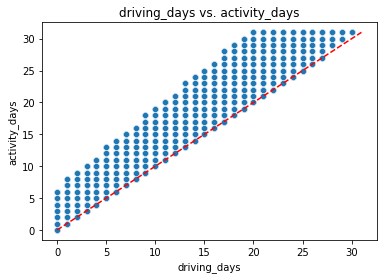

In [27]:
# Scatter plot
sns.scatterplot(data=df, x="driving_days", y="activity_days")
plt.plot([0,31], [0,31], color='red', linestyle='--')
plt.title('driving_days vs. activity_days')


If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

# **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

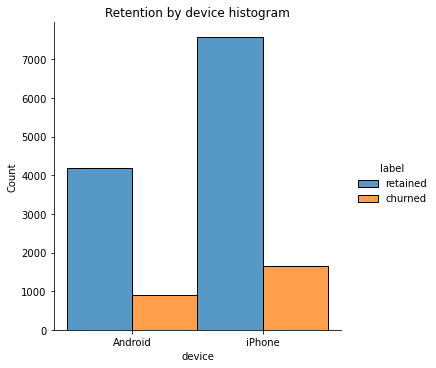

In [28]:
sns.displot(data=df, x="device", hue="label" ,multiple="dodge")
plt.title('Retention by device histogram');

The proportion of churned users to retained users is consistent between device types.

# Retention by kilometers driven per driving day


To do this, we are creating a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

In [29]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives']/df['driving_days']
# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [30]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

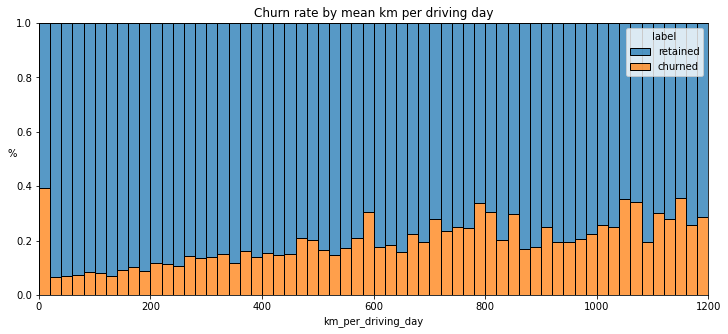

In [44]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

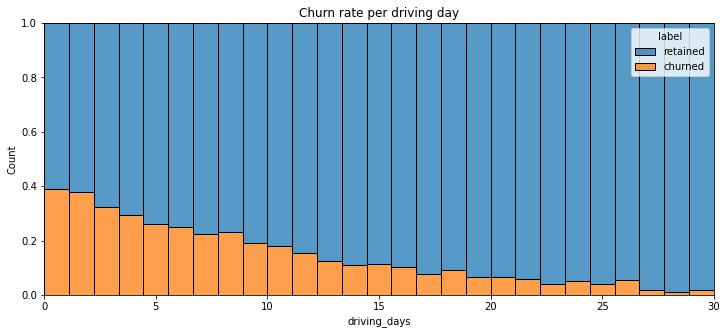

In [46]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df, x="driving_days", hue="label", multiple="fill")
plt.title('Churn rate per driving day');

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

# Proportion of sessions that occurred in the last month

We will create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [33]:
df['percent_sessions_in_last_month'] = (df['sessions']/df['total_sessions'])*100
df['percent_sessions_in_last_month'].describe()

count    14999.000000
mean        44.925534
std         28.691863
min          0.000000
25%         19.622145
50%         42.309703
75%         68.721626
max        153.063707
Name: percent_sessions_in_last_month, dtype: float64

Median of new column

In [34]:
df['percent_sessions_in_last_month'].median()

42.30970299276318

Now, create a histogram depicting the distribution of values in this new column.

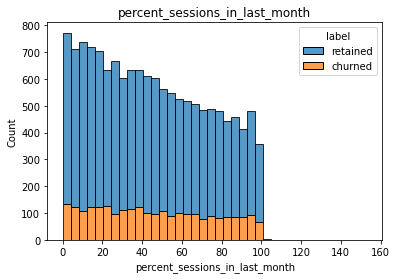

In [47]:
# Histogram
sns.histplot(data=df, x='percent_sessions_in_last_month' ,hue='label', multiple="stack")
plt.title('percent_sessions_in_last_month');

Check the median value of the `n_days_after_onboarding` variable.

In [36]:
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

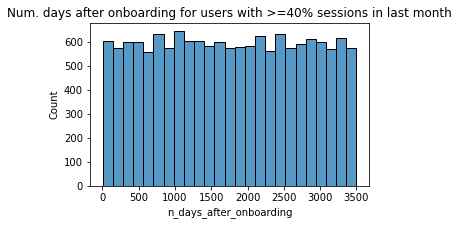

In [48]:
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

# Handling Outliers
The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

We will create a new function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile. Such as the 95th percentile of the distribution.



In [38]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

Next we will apply the function above to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [49]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.34351188399995
         driven_km_drives | percentile: 0.95 | threshold: 8889.77766066
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.8217213


Call `describe()` to see if your change worked.

In [40]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,44.925534
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,28.691863
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,19.622145
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,42.309703
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,68.721626
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,153.063707


# Conclusion

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

Last Points
I noticed a rightly skewed distribution in the charts. Moreover, I noticed that there was a higher rate of drivers in the past month. I would like to know what specifically they were using the app for next time. 

What was problematic was that for the churrned users, the driving distance was greater as compared to the retained users. 

The percentage of churrned vs retained was 83% (added with Nan values) to 17%.

The main factor seems to be type of device, with higher churn rate with iPhone users vs Android users. Probably due to OS and in app device preference.  